In [249]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from  sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,classification_report,f1_score

In [251]:
data=pd.read_csv("predictive_maintenance_dataset.csv")

In [252]:
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [253]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [254]:
data.drop(columns=['Product ID','UDI'],inplace=True,axis=1)

In [255]:
data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


<AxesSubplot:xlabel='Failure Type', ylabel='count'>

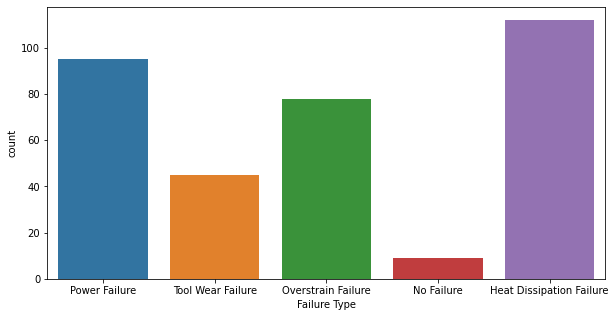

In [256]:
plt.figure(figsize=(10,5))
sns.countplot(data=data[data['Target']==1],x="Failure Type")

In [257]:
label=LabelEncoder()
data['Type']=label.fit_transform(data['Type'])
data['Failure Type']=label.fit_transform(data['Failure Type'])

In [258]:
data['Failure Type'].unique()


array([1, 3, 5, 2, 4, 0])

In [259]:
data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,2,298.1,308.6,1551,42.8,0,0,1
1,1,298.2,308.7,1408,46.3,3,0,1
2,1,298.1,308.5,1498,49.4,5,0,1
3,1,298.2,308.6,1433,39.5,7,0,1
4,1,298.2,308.7,1408,40.0,9,0,1


In [260]:
scaler = MinMaxScaler()
data[['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']]=scaler.fit_transform(data[['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']])

In [261]:
data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,2,0.304348,0.358025,0.222934,0.535714,0.000000,0,1
1,1,0.315217,0.370370,0.139697,0.583791,0.011858,0,1
2,1,0.304348,0.345679,0.192084,0.626374,0.019763,0,1
3,1,0.315217,0.358025,0.154249,0.490385,0.027668,0,1
4,1,0.315217,0.370370,0.139697,0.497253,0.035573,0,1


In [262]:
x=data[['Type','Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']]
y=data['Target']

In [263]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=746)

## Logistic Regression

In [264]:
lgr1=LogisticRegression()
lgr1.fit(x_train,y_train)
y_pred_lgr1=lgr1.predict(x_test)

In [265]:
accuracy_scr = round(accuracy_score(y_test,y_pred_lgr1), 3)
print("Accuracy Score of logistic regression [Target] : ", accuracy_scr)
print("Confusion Matrix of logistic regression [Target] :\n",confusion_matrix(y_test,y_pred_lgr1))
print("Classification Report of logistic regression[Target] : \n",classification_report(y_test,y_pred_lgr1))

cohen3_lgr1 = metrics.cohen_kappa_score(y_test,y_pred_lgr1)
print('Cohen Kappa: %.3f' % cohen3_lgr1)

Accuracy Score of logistic regression [Target] :  0.969
Confusion Matrix of logistic regression [Target] :
 [[2905    0]
 [  94    1]]
Classification Report of logistic regression[Target] : 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      2905
           1       1.00      0.01      0.02        95

    accuracy                           0.97      3000
   macro avg       0.98      0.51      0.50      3000
weighted avg       0.97      0.97      0.95      3000

Cohen Kappa: 0.020


[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

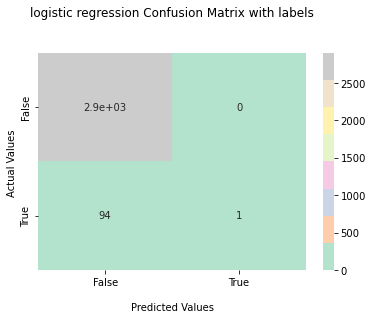

In [266]:
ax = sns.heatmap(confusion_matrix(y_test,y_pred_lgr1), annot=True, cmap='Pastel2')

ax.set_title('logistic regression Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

### SVC Using GridSearch

In [267]:
param_grid = param_grid = {'C': [0.1, 1, 10],
              'degree': [1, 2, 3],
              'kernel': ['rbf','linear']}
SVC_grid1 = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
SVC_grid1.fit(x_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END .......C=0.1, degree=1, kernel=rbf;, score=0.966 total time=   0.2s
[CV 2/5] END .......C=0.1, degree=1, kernel=rbf;, score=0.965 total time=   0.2s
[CV 3/5] END .......C=0.1, degree=1, kernel=rbf;, score=0.965 total time=   0.2s
[CV 4/5] END .......C=0.1, degree=1, kernel=rbf;, score=0.965 total time=   0.2s
[CV 5/5] END .......C=0.1, degree=1, kernel=rbf;, score=0.965 total time=   0.2s
[CV 1/5] END ....C=0.1, degree=1, kernel=linear;, score=0.966 total time=   0.1s
[CV 2/5] END ....C=0.1, degree=1, kernel=linear;, score=0.965 total time=   0.1s
[CV 3/5] END ....C=0.1, degree=1, kernel=linear;, score=0.965 total time=   0.1s
[CV 4/5] END ....C=0.1, degree=1, kernel=linear;, score=0.965 total time=   0.1s
[CV 5/5] END ....C=0.1, degree=1, kernel=linear;, score=0.965 total time=   0.1s
[CV 1/5] END .......C=0.1, degree=2, kernel=rbf;, score=0.966 total time=   0.2s
[CV 2/5] END .......C=0.1, degree=2, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'degree': [1, 2, 3],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [268]:
print("Best params from Support Vector Classifier [Target] : ",SVC_grid1.best_params_)
y_pred_SVC1=SVC_grid1.predict(x_test)
print("Accuracy Score of Support Vector Classifier [Target] : ",accuracy_score(y_test,y_pred_SVC1))
print("Confusion Matrix of Support Vector Classifier [Target] :\n",confusion_matrix(y_test,y_pred_SVC1))
print("Classification Report of Support Vector Classifier[Target] : \n",classification_report(y_test,y_pred_SVC1))

cohen3_SVC1 = metrics.cohen_kappa_score(y_test,y_pred_SVC1)
print('Cohen Kappa: %.3f' % cohen3_SVC1)

Best params from Support Vector Classifier [Target] :  {'C': 10, 'degree': 1, 'kernel': 'rbf'}
Accuracy Score of Support Vector Classifier [Target] :  0.975
Confusion Matrix of Support Vector Classifier [Target] :
 [[2905    0]
 [  75   20]]
Classification Report of Support Vector Classifier[Target] : 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      2905
           1       1.00      0.21      0.35        95

    accuracy                           0.97      3000
   macro avg       0.99      0.61      0.67      3000
weighted avg       0.98      0.97      0.97      3000

Cohen Kappa: 0.341


[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

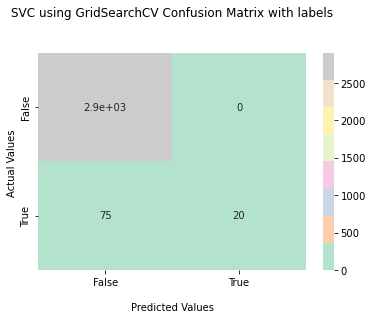

In [269]:
ax = sns.heatmap(confusion_matrix(y_test,y_pred_SVC1), annot=True, cmap='Pastel2')

ax.set_title('SVC using GridSearchCV Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Random Forest Using GridSearchCV

In [270]:
param_grid = {'max_depth':[3,4,5,6,7,8],'criterion':['gini', 'entropy']}
rf_grid1 = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3)
rf_grid1.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .......criterion=gini, max_depth=3;, score=0.972 total time=   0.2s
[CV 2/5] END .......criterion=gini, max_depth=3;, score=0.974 total time=   0.2s
[CV 3/5] END .......criterion=gini, max_depth=3;, score=0.969 total time=   0.2s
[CV 4/5] END .......criterion=gini, max_depth=3;, score=0.968 total time=   0.2s
[CV 5/5] END .......criterion=gini, max_depth=3;, score=0.971 total time=   0.2s
[CV 1/5] END .......criterion=gini, max_depth=4;, score=0.975 total time=   0.2s
[CV 2/5] END .......criterion=gini, max_depth=4;, score=0.974 total time=   0.2s
[CV 3/5] END .......criterion=gini, max_depth=4;, score=0.974 total time=   0.2s
[CV 4/5] END .......criterion=gini, max_depth=4;, score=0.969 total time=   0.2s
[CV 5/5] END .......criterion=gini, max_depth=4;, score=0.974 total time=   0.2s
[CV 1/5] END .......criterion=gini, max_depth=5;, score=0.973 total time=   0.2s
[CV 2/5] END .......criterion=gini, max_depth=5;

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8]},
             verbose=3)

In [271]:
print("Best params from Random Forest Classifier [Target] : ",rf_grid1.best_params_)
y_pred_rf1=rf_grid1.predict(x_test)
print("Accuracy Score of Random Forest Classifier [Target] : ",accuracy_score(y_test,y_pred_rf1))
print("Confusion Matrix of Random Forest Classifier [Target] :\n",confusion_matrix(y_test,y_pred_rf1))
print("Classification Report of Random Forest Classifier[Target] : \n",classification_report(y_test,y_pred_rf1))

cohen3_rf1 = metrics.cohen_kappa_score(y_test,y_pred_rf1)
print('Cohen Kappa: %.3f' % cohen3_rf1)

Best params from Random Forest Classifier [Target] :  {'criterion': 'entropy', 'max_depth': 8}
Accuracy Score of Random Forest Classifier [Target] :  0.98
Confusion Matrix of Random Forest Classifier [Target] :
 [[2900    5]
 [  55   40]]
Classification Report of Random Forest Classifier[Target] : 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2905
           1       0.89      0.42      0.57        95

    accuracy                           0.98      3000
   macro avg       0.94      0.71      0.78      3000
weighted avg       0.98      0.98      0.98      3000

Cohen Kappa: 0.563


[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

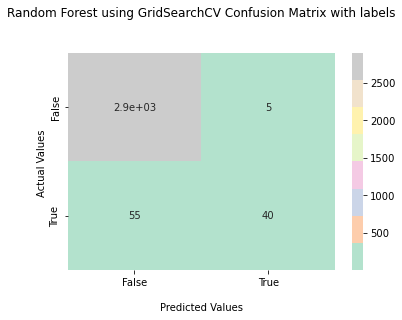

In [272]:
ax = sns.heatmap(confusion_matrix(y_test,y_pred_rf1), annot=True, cmap='Pastel2')

ax.set_title('Random Forest using GridSearchCV Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## K- Nearest Neighbor Using GridSearchCV

In [273]:
param_grid = {'n_neighbors':[3,4,5,6,7,8]}
knn_grid1 = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, verbose = 3)
knn_grid1.fit(x_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END .....................n_neighbors=3;, score=0.971 total time=   0.0s
[CV 2/5] END .....................n_neighbors=3;, score=0.971 total time=   0.0s
[CV 3/5] END .....................n_neighbors=3;, score=0.975 total time=   0.0s
[CV 4/5] END .....................n_neighbors=3;, score=0.965 total time=   0.0s
[CV 5/5] END .....................n_neighbors=3;, score=0.973 total time=   0.0s
[CV 1/5] END .....................n_neighbors=4;, score=0.971 total time=   0.0s
[CV 2/5] END .....................n_neighbors=4;, score=0.967 total time=   0.0s
[CV 3/5] END .....................n_neighbors=4;, score=0.971 total time=   0.0s
[CV 4/5] END .....................n_neighbors=4;, score=0.967 total time=   0.0s
[CV 5/5] END .....................n_neighbors=4;, score=0.969 total time=   0.0s
[CV 1/5] END .....................n_neighbors=5;, score=0.973 total time=   0.0s
[CV 2/5] END .....................n_neighbors=5;,

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8]}, verbose=3)

In [274]:
print("Best params from K- Nearest Neighbor [Target] : ",knn_grid1.best_params_)
y_pred_knn1=knn_grid1.predict(x_test)
print("Accuracy Score of K- Nearest Neighbor [Target] : ",accuracy_score(y_test,y_pred_knn1))
print("Confusion Matrix of K- Nearest Neighbor [Target] :\n",confusion_matrix(y_test,y_pred_knn1))
print("Classification Report of K- Nearest NeighborTarget] : \n",classification_report(y_test,y_pred_knn1))

cohen3_knn1 = metrics.cohen_kappa_score(y_test,y_pred_knn1)
print('Cohen Kappa: %.3f' % cohen3_knn1)

Best params from K- Nearest Neighbor [Target] :  {'n_neighbors': 3}
Accuracy Score of K- Nearest Neighbor [Target] :  0.976
Confusion Matrix of K- Nearest Neighbor [Target] :
 [[2895   10]
 [  62   33]]
Classification Report of K- Nearest NeighborTarget] : 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2905
           1       0.77      0.35      0.48        95

    accuracy                           0.98      3000
   macro avg       0.87      0.67      0.73      3000
weighted avg       0.97      0.98      0.97      3000

Cohen Kappa: 0.468


[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

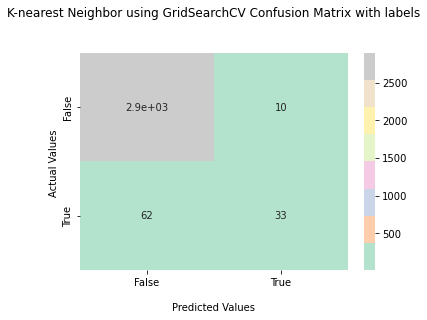

In [275]:
ax = sns.heatmap(confusion_matrix(y_test,y_pred_knn1), annot=True, cmap='Pastel2')


ax.set_title('K-nearest Neighbor using GridSearchCV Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True']) 

# Problem 2 by considering Failure Type as dependent variable

In [276]:
x1=data[['Type','Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]','Target']]
y1=data['Failure Type']

In [277]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.3,random_state=42)

## Logistic Regression

In [278]:
lgr2=LogisticRegression()
lgr2.fit(x1_train,y1_train)
y1_pred_lgr2=lgr2.predict(x1_test)

In [279]:
print("Accuracy Score of Logistic Regression [Failure Type] : ",accuracy_score(y1_test,y1_pred_lgr2))
print("Confusion Matrix of Logistic Regression [Failure Type] :\n",confusion_matrix(y1_test,y1_pred_lgr2))
print("Classification Report of Logistic Regression [Failure Type] : \n",classification_report(y1_test,y1_pred_lgr2))

cohen3_lgr2 = metrics.cohen_kappa_score(y1_test,y1_pred_lgr2)
print('Cohen Kappa: %.3f' % cohen3_lgr2)

Accuracy Score of Logistic Regression [Failure Type] :  0.9876666666666667
Confusion Matrix of Logistic Regression [Failure Type] :
 [[  23    0    0    0    0    0]
 [   2 2900    0    1    0    0]
 [   3    0   19    0    0    0]
 [   7    0    8   16    0    0]
 [   0    7    0    0    0    0]
 [   2    0    7    0    0    5]]
Classification Report of Logistic Regression [Failure Type] : 
               precision    recall  f1-score   support

           0       0.62      1.00      0.77        23
           1       1.00      1.00      1.00      2903
           2       0.56      0.86      0.68        22
           3       0.94      0.52      0.67        31
           4       0.00      0.00      0.00         7
           5       1.00      0.36      0.53        14

    accuracy                           0.99      3000
   macro avg       0.69      0.62      0.61      3000
weighted avg       0.99      0.99      0.99      3000

Cohen Kappa: 0.801


/Users/saipranitha/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/saipranitha/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/saipranitha/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


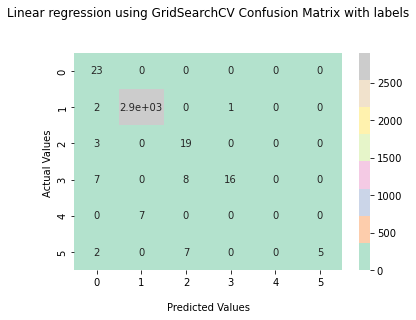

In [291]:
ax = sns.heatmap(confusion_matrix(y1_test,y1_pred_lgr2), annot=True, cmap='Pastel2')


ax.set_title('Linear regression using GridSearchCV Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
#ax.xaxis.set_ticklabels(['False','True'])
#ax.yaxis.set_ticklabels(['False','True']) 

## SVC Using GridSearchCV

In [281]:
param_grid = param_grid = {'C': [0.1, 1, 10],
              'degree': [1, 2, 3],
              'kernel': ['rbf','linear']}
SVC_grid2 = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
SVC_grid2.fit(x1_train, y1_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END .......C=0.1, degree=1, kernel=rbf;, score=0.987 total time=   0.2s
[CV 2/5] END .......C=0.1, degree=1, kernel=rbf;, score=0.985 total time=   0.2s
[CV 3/5] END .......C=0.1, degree=1, kernel=rbf;, score=0.981 total time=   0.2s
[CV 4/5] END .......C=0.1, degree=1, kernel=rbf;, score=0.984 total time=   0.2s
[CV 5/5] END .......C=0.1, degree=1, kernel=rbf;, score=0.981 total time=   0.2s
[CV 1/5] END ....C=0.1, degree=1, kernel=linear;, score=0.986 total time=   0.1s
[CV 2/5] END ....C=0.1, degree=1, kernel=linear;, score=0.984 total time=   0.1s
[CV 3/5] END ....C=0.1, degree=1, kernel=linear;, score=0.982 total time=   0.1s
[CV 4/5] END ....C=0.1, degree=1, kernel=linear;, score=0.983 total time=   0.1s
[CV 5/5] END ....C=0.1, degree=1, kernel=linear;, score=0.981 total time=   0.1s
[CV 1/5] END .......C=0.1, degree=2, kernel=rbf;, score=0.987 total time=   0.2s
[CV 2/5] END .......C=0.1, degree=2, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'degree': [1, 2, 3],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [282]:
print("Best params from Support Vector Classifier [Failure Type] : ",SVC_grid2.best_params_)
y1_pred_SVC2=SVC_grid2.predict(x1_test)
print("Accuracy Score of Support Vector Classifier [Failure Type] : ",accuracy_score(y1_test,y1_pred_SVC2))
print("Confusion Matrix of Support Vector Classifier [Failure Type] :\n",confusion_matrix(y1_test,y1_pred_SVC2))
print("Classification Report of SVC using GridSearchCV [Failure Type] : \n",classification_report(y1_test,y1_pred_SVC2))

cohen3_SVC2 = metrics.cohen_kappa_score(y1_test,y1_pred_SVC2)
print('Cohen Kappa: %.3f' % cohen3_SVC2)

Best params from Support Vector Classifier [Failure Type] :  {'C': 10, 'degree': 1, 'kernel': 'linear'}
Accuracy Score of Support Vector Classifier [Failure Type] :  0.9933333333333333
Confusion Matrix of Support Vector Classifier [Failure Type] :
 [[  23    0    0    0    0    0]
 [   1 2901    0    1    0    0]
 [   1    0   21    0    0    0]
 [   1    0    5   25    0    0]
 [   0    7    0    0    0    0]
 [   1    0    3    0    0   10]]
Classification Report of SVC using GridSearchCV [Failure Type] : 
               precision    recall  f1-score   support

           0       0.85      1.00      0.92        23
           1       1.00      1.00      1.00      2903
           2       0.72      0.95      0.82        22
           3       0.96      0.81      0.88        31
           4       0.00      0.00      0.00         7
           5       1.00      0.71      0.83        14

    accuracy                           0.99      3000
   macro avg       0.76      0.75      0.74      30

/Users/saipranitha/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/saipranitha/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/saipranitha/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


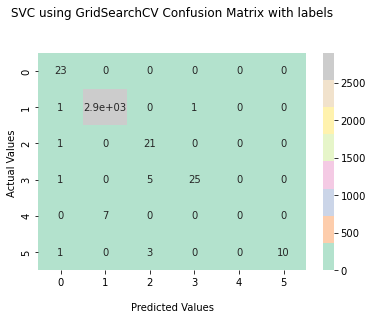

In [292]:
ax = sns.heatmap(confusion_matrix(y1_test,y1_pred_SVC2), annot=True, cmap='Pastel2')


ax.set_title('SVC using GridSearchCV Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Random Forest Using GridSearchCV

In [284]:
param_grid = {'max_depth':[3,4,5,6,7,8],'criterion':['gini', 'entropy']}
rf_grid2 = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3)
rf_grid2.fit(x1_train, y1_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .......criterion=gini, max_depth=3;, score=0.987 total time=   0.2s
[CV 2/5] END .......criterion=gini, max_depth=3;, score=0.988 total time=   0.2s
[CV 3/5] END .......criterion=gini, max_depth=3;, score=0.984 total time=   0.2s
[CV 4/5] END .......criterion=gini, max_depth=3;, score=0.985 total time=   0.2s
[CV 5/5] END .......criterion=gini, max_depth=3;, score=0.984 total time=   0.2s
[CV 1/5] END .......criterion=gini, max_depth=4;, score=0.994 total time=   0.2s
[CV 2/5] END .......criterion=gini, max_depth=4;, score=0.994 total time=   0.2s
[CV 3/5] END .......criterion=gini, max_depth=4;, score=0.991 total time=   0.2s
[CV 4/5] END .......criterion=gini, max_depth=4;, score=0.991 total time=   0.2s
[CV 5/5] END .......criterion=gini, max_depth=4;, score=0.991 total time=   0.2s
[CV 1/5] END .......criterion=gini, max_depth=5;, score=0.994 total time=   0.2s
[CV 2/5] END .......criterion=gini, max_depth=5;

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8]},
             verbose=3)

In [285]:
print("Best params from Random Forest Classifier [Failure Type] : ",rf_grid2.best_params_)
y1_pred_rf2=rf_grid2.predict(x1_test)
print("Accuracy Score of Random Forest Classifier [Failure Type] : ",accuracy_score(y1_test,y1_pred_rf2))
print("Confusion Matrix of Random Forest Classifier [Failure Type] :\n",confusion_matrix(y1_test,y1_pred_rf2))
print("Classification Report of Random Forest using GridSearchCV [Failure Type] : \n",classification_report(y1_test,y1_pred_rf2))

cohen3_rf2 = metrics.cohen_kappa_score(y1_test,y1_pred_rf2)
print('Cohen Kappa: %.3f' % cohen3_rf2)

Best params from Random Forest Classifier [Failure Type] :  {'criterion': 'gini', 'max_depth': 8}
Accuracy Score of Random Forest Classifier [Failure Type] :  0.9953333333333333
Confusion Matrix of Random Forest Classifier [Failure Type] :
 [[  23    0    0    0    0    0]
 [   0 2902    0    1    0    0]
 [   2    0   19    0    0    1]
 [   0    0    2   29    0    0]
 [   0    7    0    0    0    0]
 [   0    0    1    0    0   13]]
Classification Report of Random Forest using GridSearchCV [Failure Type] : 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        23
           1       1.00      1.00      1.00      2903
           2       0.86      0.86      0.86        22
           3       0.97      0.94      0.95        31
           4       0.00      0.00      0.00         7
           5       0.93      0.93      0.93        14

    accuracy                           1.00      3000
   macro avg       0.78      0.79      0.78      

/Users/saipranitha/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/saipranitha/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/saipranitha/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


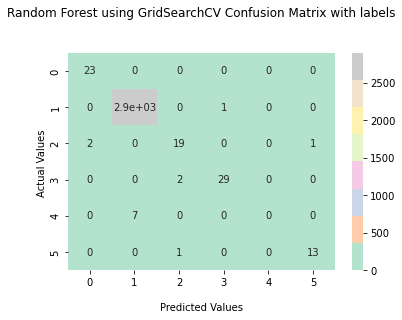

In [293]:
ax = sns.heatmap(confusion_matrix(y1_test,y1_pred_rf2), annot=True, cmap='Pastel2')


ax.set_title('Random Forest using GridSearchCV Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## K- Nearest Neighbor

In [287]:
param_grid = {'n_neighbors':[3,4,5,6,7,8]}
knn_grid2 = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, verbose = 3)
knn_grid2.fit(x1_train,y1_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END .....................n_neighbors=3;, score=0.994 total time=   0.1s
[CV 2/5] END .....................n_neighbors=3;, score=0.991 total time=   0.0s
[CV 3/5] END .....................n_neighbors=3;, score=0.988 total time=   0.0s
[CV 4/5] END .....................n_neighbors=3;, score=0.995 total time=   0.0s
[CV 5/5] END .....................n_neighbors=3;, score=0.991 total time=   0.0s
[CV 1/5] END .....................n_neighbors=4;, score=0.995 total time=   0.0s
[CV 2/5] END .....................n_neighbors=4;, score=0.990 total time=   0.0s
[CV 3/5] END .....................n_neighbors=4;, score=0.990 total time=   0.0s
[CV 4/5] END .....................n_neighbors=4;, score=0.995 total time=   0.0s
[CV 5/5] END .....................n_neighbors=4;, score=0.989 total time=   0.0s
[CV 1/5] END .....................n_neighbors=5;, score=0.994 total time=   0.0s
[CV 2/5] END .....................n_neighbors=5;,

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8]}, verbose=3)

In [288]:
print("Best params from KNN [Failure Type] : ",knn_grid2.best_params_)
y1_pred_knn2=knn_grid2.predict(x1_test)
print("Accuracy Score of KNN [Failure Type] : ",accuracy_score(y1_test,y1_pred_knn2))
print("Confusion Matrix of KNN [Failure Type] :\n",confusion_matrix(y1_test,y1_pred_knn2))
print("Classification Report of KNN using GridSearchCV [Failure Type] : \n",classification_report(y1_test,y1_pred_knn2))

cohen3_knn2 = metrics.cohen_kappa_score(y1_test,y1_pred_knn2)
print('Cohen Kappa: %.3f' % cohen3_knn2)

Best params from KNN [Failure Type] :  {'n_neighbors': 4}
Accuracy Score of KNN [Failure Type] :  0.9893333333333333
Confusion Matrix of KNN [Failure Type] :
 [[  22    0    1    0    0    0]
 [   2 2900    0    0    0    1]
 [   1    0   19    1    0    1]
 [   8    0    7   15    0    1]
 [   0    7    0    0    0    0]
 [   1    0    0    1    0   12]]
Classification Report of KNN using GridSearchCV [Failure Type] : 
               precision    recall  f1-score   support

           0       0.65      0.96      0.77        23
           1       1.00      1.00      1.00      2903
           2       0.70      0.86      0.78        22
           3       0.88      0.48      0.62        31
           4       0.00      0.00      0.00         7
           5       0.80      0.86      0.83        14

    accuracy                           0.99      3000
   macro avg       0.67      0.69      0.67      3000
weighted avg       0.99      0.99      0.99      3000

Cohen Kappa: 0.828


/Users/saipranitha/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/saipranitha/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/saipranitha/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


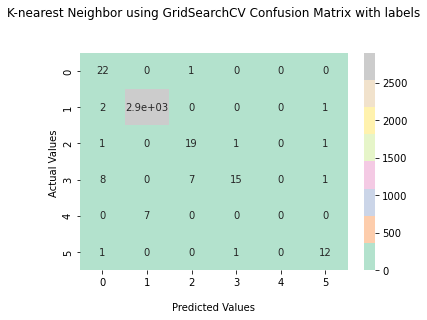

In [289]:
ax = sns.heatmap(confusion_matrix(y1_test,y1_pred_knn2), annot=True, cmap='Pastel2')


ax.set_title('K-nearest Neighbor using GridSearchCV Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');